In [4]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix


In [5]:

dataset_path = "data_17Flowers/train"


idg=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=(0.8,1.2),
    zoom_range=0.1,
    shear_range=0.3,
    rotation_range=10,
    validation_split=0.2

)

train_data=idg.flow_from_directory(
    dataset_path,
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32,
    subset='training',

)
val_data=idg.flow_from_directory(
    dataset_path,
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32,
    subset='validation',

)

Found 823 images belonging to 17 classes.
Found 197 images belonging to 17 classes.


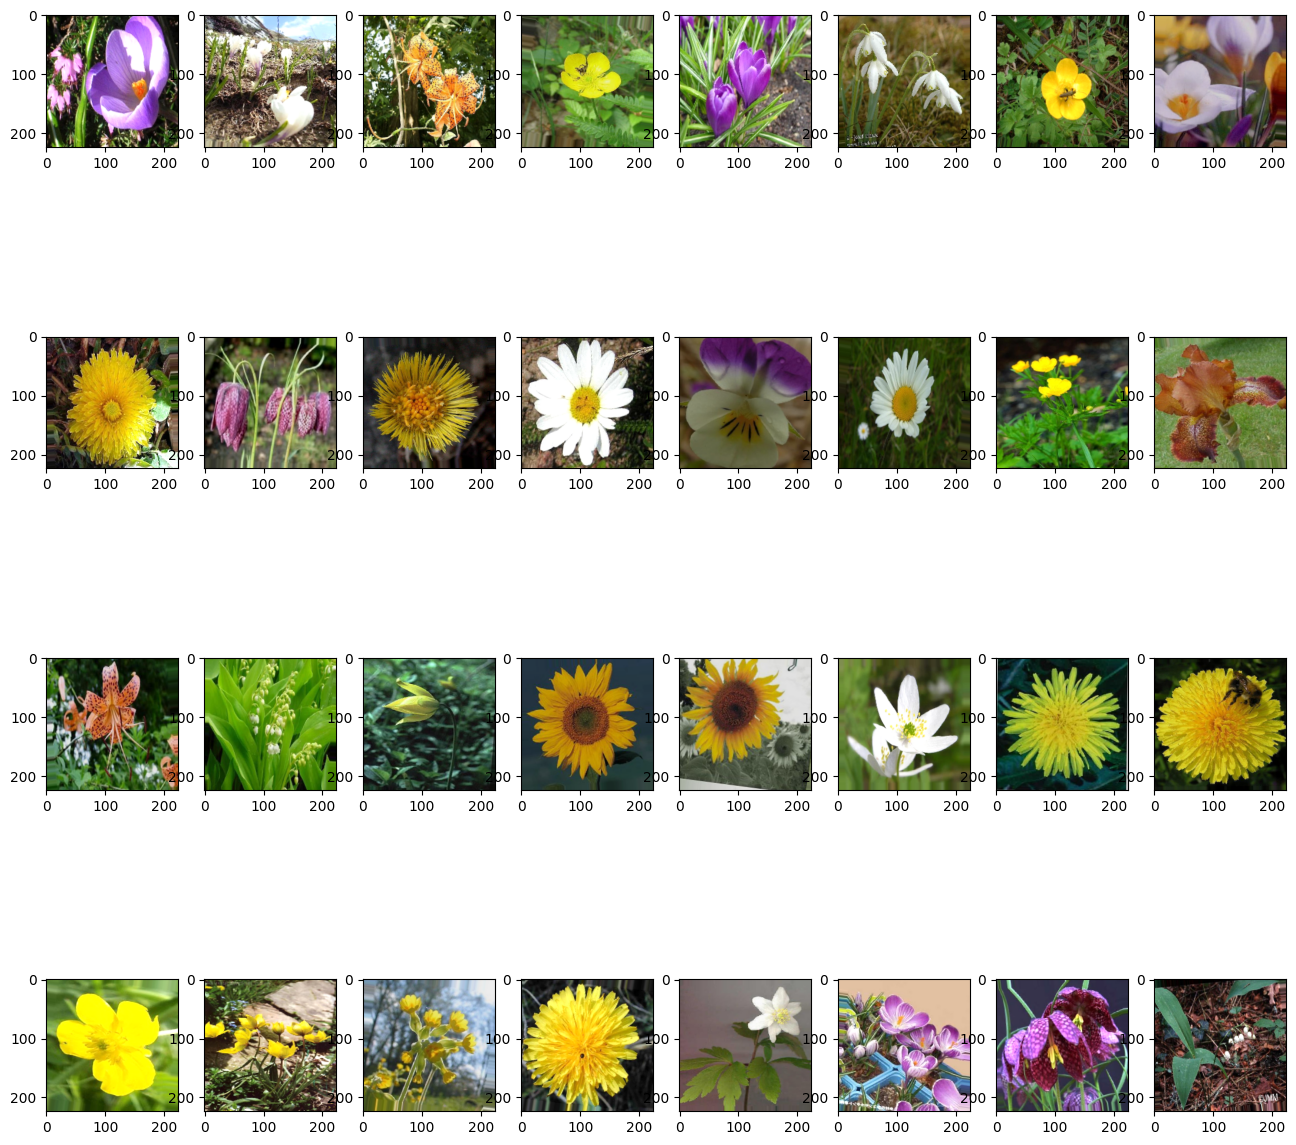

In [6]:

some_images=next(train_data)
X=some_images[0]
Y=some_images[1]

plt.figure(figsize=(16,16))
for i in range(32):
  plt.subplot(4,8,i+1)
  plt.imshow(X[i])


In [7]:
model = tf.keras.models.Sequential([
  layers.Conv2D(16,(3,3),activation='relu',strides=(2, 2),input_shape=(224,224,3)),
  layers.Conv2D(54,(3,3),activation='relu',strides=(2, 2)),
  layers.MaxPool2D(),
  layers.Conv2D(64,(5,5),activation='relu',strides=(2, 2)),
  layers.Conv2D(128,(3,3),activation='relu',strides=(2, 2)),
  layers.MaxPool2D(),
  layers.Flatten(),
  layers.Dense(512,activation='relu'),
  layers.Dense(17,activation='softmax')
])

In [8]:

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=["accuracy"]
)



In [14]:
plt_model = model.fit(train_data, validation_data=val_data, epochs=20)

Epoch 1/20
26/26 [==============================] - 17s 621ms/step - loss: 2.8254 - accuracy: 0.0851 - val_loss: 2.6448 - val_accuracy: 0.1168
Epoch 2/20
26/26 [==============================] - 15s 559ms/step - loss: 2.4173 - accuracy: 0.1555 - val_loss: 2.1885 - val_accuracy: 0.2132
Epoch 3/20
26/26 [==============================] - 12s 479ms/step - loss: 2.2107 - accuracy: 0.2454 - val_loss: 1.8785 - val_accuracy: 0.2995
Epoch 4/20
26/26 [==============================] - 12s 460ms/step - loss: 1.9044 - accuracy: 0.3341 - val_loss: 1.7092 - val_accuracy: 0.4213
Epoch 5/20
26/26 [==============================] - 12s 469ms/step - loss: 1.6663 - accuracy: 0.4338 - val_loss: 1.4441 - val_accuracy: 0.4264
Epoch 6/20
26/26 [==============================] - 12s 472ms/step - loss: 1.5128 - accuracy: 0.4751 - val_loss: 1.4268 - val_accuracy: 0.4569
Epoch 7/20
26/26 [==============================] - 13s 500ms/step - loss: 1.4209 - accuracy: 0.5188 - val_loss: 1.2877 - val_accuracy: 0.4822

In [15]:

test_dataset_path = 'data_17Flowers/test'
width=height = 224
batch_size = 32
idg = ImageDataGenerator(
    rescale = 1./255,
)


test_data = idg.flow_from_directory(
    test_dataset_path,
    target_size = (width,height),
    class_mode = "categorical",
    batch_size = batch_size,
)

Found 340 images belonging to 17 classes.


In [16]:
model.evaluate(test_data)

11/11 [==============================] - 1s 104ms/step - loss: 1.3104 - accuracy: 0.6088


[1.3103541135787964, 0.6088235378265381]

In [17]:
model.save("weights/17_Flowers.h5")


C:\Users\nematizadeh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 1s 98ms/step


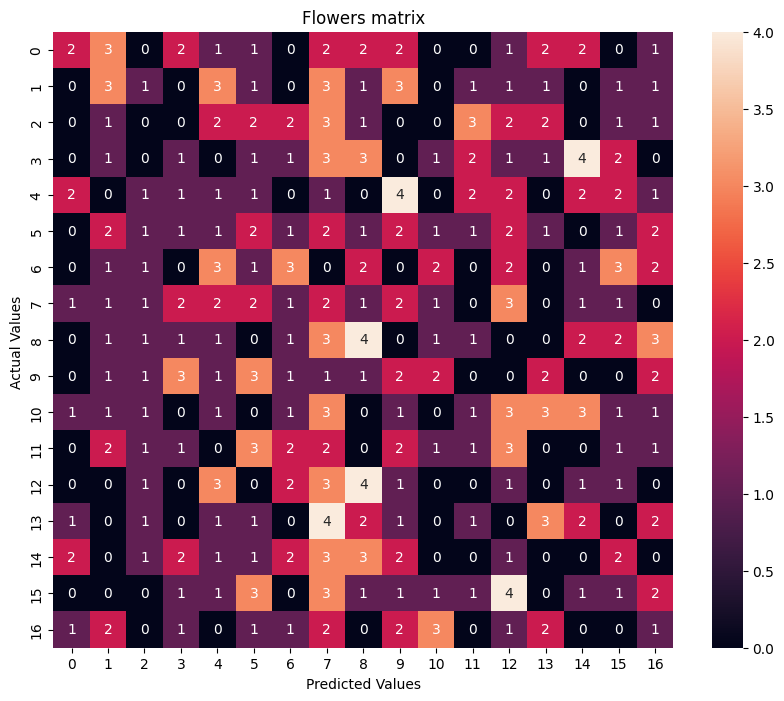

In [19]:
import seaborn as sns

Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)
conf_mat = confusion_matrix(test_data.classes, y_pred)

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(conf_mat, annot=True)
ax.set_title('Flowers matrix')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')

plt.show()